### Using pandas get_dummies
### using sklearn OneHotEncoder

### Build a predictor function to predict price of a home
1) with 3400 sqr ft area in west windsor
2) 2800 sqr ft home in robbinsville

#### One hot Encoding concepts in ML

One-hot encoding in machine learning is the conversion of categorical information into a format that may be fed into machine learning algorithms to improve prediction accuracy. One-hot encoding is a common method for dealing with categorical data in machine learning.

In [1]:
import pandas as pd

In [2]:
## read the csv file
csvlink = "csv/home_prices_with_town_names.csv"
df = pd.read_csv(csvlink)

In [3]:
#first five rows from that csv file
df.head(2)

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000


In [4]:
## print the df which is our original data
df

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000
5,west windsor,2600,585000
6,west windsor,2800,615000
7,west windsor,3300,650000
8,west windsor,3600,710000
9,robinsville,2600,575000


In [5]:
## convert categorical variable into numeric one and this is our dummy data
dummies = pd.get_dummies(df.town)
dummies

,monroe township,robinsville,west windsor
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
5,0,0,1
6,0,0,1
7,0,0,1
8,0,0,1
9,0,1,0


In [6]:
#### Now we have to join dummies data and original data
df_dummies = pd.concat([df,dummies],axis='columns')

In [7]:
## After joining our two dataframe( df and dummies)
df_dummies

,town,area,price,monroe township,robinsville,west windsor
0,monroe township,2600,550000,1,0,0
1,monroe township,3000,565000,1,0,0
2,monroe township,3200,610000,1,0,0
3,monroe township,3600,680000,1,0,0
4,monroe township,4000,725000,1,0,0
5,west windsor,2600,585000,0,0,1
6,west windsor,2800,615000,0,0,1
7,west windsor,3300,650000,0,0,1
8,west windsor,3600,710000,0,0,1
9,robinsville,2600,575000,0,1,0


In [8]:
## get the columns
df_dummies.columns

Index(['town', 'area', 'price', 'monroe township', 'robinsville',
       'west windsor'],
      dtype='object')

#### Using pandas Get Dummies Model

In [9]:
### now dropping categorical column [town] and [west windsor]
df_dummies.drop(['town','west windsor'],axis='columns',inplace=True)
df_dummies

,area,price,monroe township,robinsville
0,2600,550000,1,0
1,3000,565000,1,0
2,3200,610000,1,0
3,3600,680000,1,0
4,4000,725000,1,0
5,2600,585000,0,0
6,2800,615000,0,0
7,3300,650000,0,0
8,3600,710000,0,0
9,2600,575000,0,1


In [10]:
X=df_dummies.drop('price',axis="columns")
X

,area,monroe township,robinsville
0,2600,1,0
1,3000,1,0
2,3200,1,0
3,3600,1,0
4,4000,1,0
5,2600,0,0
6,2800,0,0
7,3300,0,0
8,3600,0,0
9,2600,0,1


In [11]:
y=df_dummies.price
y

0     550000
1     565000
2     610000
3     680000
4     725000
5     585000
6     615000
7     650000
8     710000
9     575000
10    600000
11    620000
12    695000
Name: price, dtype: int64

In [12]:
### import LinearRegression Model
from sklearn.linear_model import LinearRegression
### create one object from this model
model = LinearRegression()
### then model.fit
model.fit(X,y)

LinearRegression()

In [13]:
model.predict([[3400,0,0]])

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([681241.66845839])

In [14]:
model.predict([[2800,0,1]])

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([590775.63964739])

In [15]:
model.predict([[2800,1,0]])

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([565089.22812299])

#### Using SKlearn One Hot Encoding Method

In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [17]:
df

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000
5,west windsor,2600,585000
6,west windsor,2800,615000
7,west windsor,3300,650000
8,west windsor,3600,710000
9,robinsville,2600,575000


In [18]:
## using the help of label Encoder we can transform the town colum with 0 and 1
dfle=df
dfle.town = le.fit_transform(dfle.town)

In [19]:
# now we can print the dfle
dfle

,town,area,price
0,0,2600,550000
1,0,3000,565000
2,0,3200,610000
3,0,3600,680000
4,0,4000,725000
5,2,2600,585000
6,2,2800,615000
7,2,3300,650000
8,2,3600,710000
9,1,2600,575000


In [20]:
X=dfle[['town','area']].values

In [21]:
X

array([[   0, 2600],
       [   0, 3000],
       [   0, 3200],
       [   0, 3600],
       [   0, 4000],
       [   2, 2600],
       [   2, 2800],
       [   2, 3300],
       [   2, 3600],
       [   1, 2600],
       [   1, 2900],
       [   1, 3100],
       [   1, 3600]])

In [22]:
y=dfle.price.values
y

array([550000, 565000, 610000, 680000, 725000, 585000, 615000, 650000,
       710000, 575000, 600000, 620000, 695000])

#### Now use one hot encoder to create dummy variables for each of the town

In [25]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([('town', OneHotEncoder(), [0])], remainder = 'passthrough')

In [26]:
X = ct.fit_transform(X)
X

array([[1.0e+00, 0.0e+00, 0.0e+00, 2.6e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 3.0e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 3.2e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 3.6e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 4.0e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 2.6e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 2.8e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 3.3e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 3.6e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 2.6e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 2.9e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 3.1e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 3.6e+03]])

In [27]:
X= X[:,1:]

In [28]:
X

array([[0.0e+00, 0.0e+00, 2.6e+03],
       [0.0e+00, 0.0e+00, 3.0e+03],
       [0.0e+00, 0.0e+00, 3.2e+03],
       [0.0e+00, 0.0e+00, 3.6e+03],
       [0.0e+00, 0.0e+00, 4.0e+03],
       [0.0e+00, 1.0e+00, 2.6e+03],
       [0.0e+00, 1.0e+00, 2.8e+03],
       [0.0e+00, 1.0e+00, 3.3e+03],
       [0.0e+00, 1.0e+00, 3.6e+03],
       [1.0e+00, 0.0e+00, 2.6e+03],
       [1.0e+00, 0.0e+00, 2.9e+03],
       [1.0e+00, 0.0e+00, 3.1e+03],
       [1.0e+00, 0.0e+00, 3.6e+03]])

In [29]:
## our model is ready and fit 
model.fit(X,y)

LinearRegression()

In [35]:
### Now we can predict 
print("3400 sqr ft home in west windsor",model.predict([[0,1,3400]]))
print("2800 sqr ft home in west windsor",model.predict([[1,0,2800]]))

3400 sqr ft home in west windsor [681241.6684584]
2800 sqr ft home in west windsor [590775.63964739]


In [36]:
### Find out the model score
model.score(X,y)

0.9573929037221873

Exercise
At the same level as this notebook on github, there is an Exercise folder that contains carprices.csv. This file has car sell prices for 3 different models. First plot data points on a scatter plot chart to see if linear regression model can be applied. If yes, then build a model that can answer following questions,

1) Predict price of a mercedez benz that is 4 yr old with mileage 45000

2) Predict price of a BMW X5 that is 7 yr old with mileage 86000

3) Tell me the score (accuracy) of your model. (Hint: use LinearRegression().score())

In [37]:
#step 1
car_df= pd.read_csv("csv/carprices.csv")

In [38]:
car_df

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


In [41]:
import matplotlib.pyplot as plt

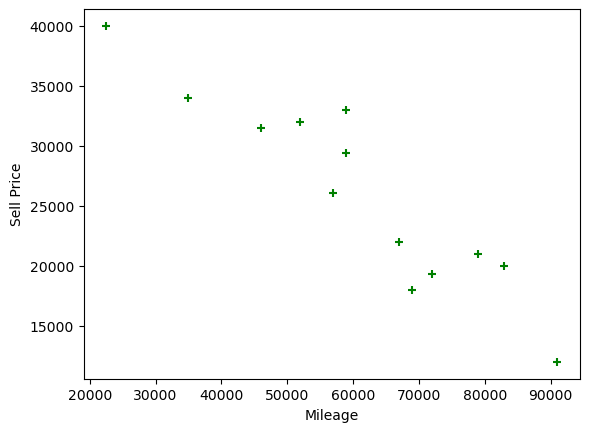

In [48]:
%matplotlib inline
plt.xlabel('Mileage')
plt.ylabel('Sell Price')
plt.scatter(car_df.Mileage,car_df["Sell Price($)"],color='green',marker='+')

##### Using pandas to create dummy variables

In [49]:
car_dummies = pd.get_dummies(car_df["Car Model"])
car_dummies

,Audi A5,BMW X5,Mercedez Benz C class
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
5,1,0,0
6,1,0,0
7,1,0,0
8,1,0,0
9,0,0,1


##### Then we have to merge this two dataframe

In [50]:
### one dataframe is car_dummies
### second dataframe is car_df
merged_df = pd.concat([car_df,car_dummies],axis='columns')
merged_df

,Car Model,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5,Mercedez Benz C class
0,BMW X5,69000,18000,6,0,1,0
1,BMW X5,35000,34000,3,0,1,0
2,BMW X5,57000,26100,5,0,1,0
3,BMW X5,22500,40000,2,0,1,0
4,BMW X5,46000,31500,4,0,1,0
5,Audi A5,59000,29400,5,1,0,0
6,Audi A5,52000,32000,5,1,0,0
7,Audi A5,72000,19300,6,1,0,0
8,Audi A5,91000,12000,8,1,0,0
9,Mercedez Benz C class,67000,22000,6,0,0,1


##### Now we can drop the car model and which is not required in my final dataframe

In [70]:
## car model should drop
final_df = merged_df.drop(['Car Model'], axis='columns')

In [52]:
### now check the final df
final_df

,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5,Mercedez Benz C class
0,69000,18000,6,0,1,0
1,35000,34000,3,0,1,0
2,57000,26100,5,0,1,0
3,22500,40000,2,0,1,0
4,46000,31500,4,0,1,0
5,59000,29400,5,1,0,0
6,52000,32000,5,1,0,0
7,72000,19300,6,1,0,0
8,91000,12000,8,1,0,0
9,67000,22000,6,0,0,1


In [71]:
### Mercedez benz class should drop
final_df = final_df.drop(['Mercedez Benz C class'], axis='columns')
final_df

,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5
0,69000,18000,6,0,1
1,35000,34000,3,0,1
2,57000,26100,5,0,1
3,22500,40000,2,0,1
4,46000,31500,4,0,1
5,59000,29400,5,1,0
6,52000,32000,5,1,0
7,72000,19300,6,1,0
8,91000,12000,8,1,0
9,67000,22000,6,0,0


In [69]:
## drop the target column
X = final_df.drop('Sell Price($)', axis='columns')
X

,Mileage,Age(yrs),Audi A5,BMW X5
0,69000,6,0,1
1,35000,3,0,1
2,57000,5,0,1
3,22500,2,0,1
4,46000,4,0,1
5,59000,5,1,0
6,52000,5,1,0
7,72000,6,1,0
8,91000,8,1,0
9,67000,6,0,0


In [57]:
### our taeget variable is y
y = final_df['Sell Price($)']

In [58]:
y

0     18000
1     34000
2     26100
3     40000
4     31500
5     29400
6     32000
7     19300
8     12000
9     22000
10    20000
11    21000
12    33000
Name: Sell Price($), dtype: int64

In [59]:
from sklearn.linear_model import LinearRegression
car_model = LinearRegression()

In [60]:
car_model.fit(X,y)

LinearRegression()

In [68]:
print("Price of mercedez benz that is 4 yr old with mileage 45000",car_model.predict([[45000,4,0,0]]))
print("Price of BMW X5 that is 7 yr old with mileage 86000",car_model.predict([[86000,7,0,1]]))

Price of mercedez benz that is 4 yr old with mileage 45000 [36991.31721061]
Price of BMW X5 that is 7 yr old with mileage 86000 [11080.74313219]


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


##### Evaluate the Model Score

In [65]:
car_model.score(X,y)

0.9417050937281082

##### Save the car model with joblib


In [77]:
import joblib
joblib.dump(car_model, 'model/car_model_joblib')

['model/car_model_joblib']

##### Import the joblib model and predict

In [78]:
load_car_model = joblib.load('model/car_model_joblib')

##### Predict the model with the help of saved model

In [79]:
print("Price of mercedez benz that is 4 yr old with mileage 45000",load_car_model.predict([[45000,4,0,0]]))
print("Price of BMW X5 that is 7 yr old with mileage 86000",load_car_model.predict([[86000,7,0,1]]))

Price of mercedez benz that is 4 yr old with mileage 45000 [36991.31721061]
Price of BMW X5 that is 7 yr old with mileage 86000 [11080.74313219]


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
